<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_Predictions_CIs_PIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 : Simple Linear Regression - Predictions, Confidence Intervals, and Prediction Intervals


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>Miles</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=14154g-4S0k9eGsqD8xlEmGahpyX79dH2" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Read in the data

In [3]:
#@title Read in Data

# Reading data in using read_csv 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

Rows: 8037 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Description, Make, Call For Price, CarType, ForeignBased, Engine, ...
dbl  (3): Year, Price, Miles


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



View the first few rows of the FindCars data.frame.

In [4]:
#@title View the first few rows of data
head(FindCars)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010 Acura TL SH-AWD W/TECH W/HPT,2010,Acura,9995,No,151126,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,Black,Black,Eagle Motors WI,"Onalaska, WI",No
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2019 Acura TLX A-Spec,2019,Acura,NA,Yes,9707,Car,Yes,3.5L V6 SOHC 24V,Auto FWD,White,White,Shakopee Chevrolet,"Shakopee, MN",No
2010 Acura TSX,2010,Acura,6500,No,165000,Car,Yes,2.4L L4 DOHC 16V,Auto FWD,Gray,Gray,Midway Auto Sales,"Rochester, MN",No
2020 Audi A3 S line Premium 45 TF,2020,Audi,38940,No,0,Car,Yes,2.0L L4 DOHC 16V,Auto 4WD/AWD,Mythos Blk Met,NA,Park Place Motor Cars,"Rochester, MN",No
2021 Audi A4 Premium,2021,Audi,43805,No,0,Car,Yes,4 2.0 L,Auto,Glacier White Metallic,White,Park Place Motor Cars,"Rochester, MN",No


## Obtain the desired subset of data

The model to be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*   CarType = Car
*   Car should have mileage between 25000 and 100000



In [5]:
FindCars_CarsOnly <- (FindCars
  %>% filter(CarType == "Car" & Miles > 25000 & Miles < 100000)
)

Before preceding, take a look at the FindCars_CarsOnly data.frame to ensure that the filtering was done correctly.

In [6]:
head(FindCars_CarsOnly, n=20)

Description,Year,Make,Price,Call For Price,Miles,CarType,ForeignBased,Engine,DriveTrain,ExactColor,Color,Dealer,Location,Sold
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019 Acura TLX SH-AWD,2019,Acura,35579,No,37506,Car,Yes,3.5L V6 SOHC 24V,Auto 4WD/AWD,White,White,Tom Kadlec Honda,"Rochester, MN",No
2018 Audi A4 Premium Plus,2018,Audi,30498,No,31949,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Matador Red Metallic,Red,Park Place Motor Cars,"Rochester, MN",No
2017 Audi A4 2.0T Premium quattro,2017,Audi,22987,No,75410,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Silver,Silver,Mercedes Benz of Roc..,"Rochester, MN",No
2017 Audi A4 Premium Plus quattro,2017,Audi,26998,No,89973,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Mythos Black Metallic,Black,Park Place Motor Cars,"Rochester, MN",No
2012 Audi A4 2.0T quattro Premium,2012,Audi,10999,No,89848,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Red,Red,Gilly's Auto Sales,"Rochester, MN",Yes
2006 Audi A4 2.0T quattro,2006,Audi,3999,No,69820,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Silver,Silver,Gilly's Auto Sales,"Rochester, MN",Yes
2019 Audi A5 Premium Sportback qu,2019,Audi,32998,No,41884,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Brilliant Black,Black,Park Place Motor Cars,"Rochester, MN",No
2018 Audi A5 Premium Plus S-Line,2018,Audi,34498,No,41434,Car,Yes,2.0L L4 DOHC 16V TU...,Auto 4WD/AWD,Brilliant Black,Black,Park Place Motor Cars,"Rochester, MN",No
2016 Audi A6 2.0T Premium Plus,2016,Audi,25990,No,48935,Car,Yes,2.0L L4 DOHC 16V,Auto 4WD/AWD,Black,Black,Chrysler Winona,"Winona, MN",No


## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Mileage</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles) = \sigma^{2}$</li>
</ul></ul>

## Simple Linear Regression - Scatterplot

The following code can be used to to create a scatterplot and include simple linear regression line.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


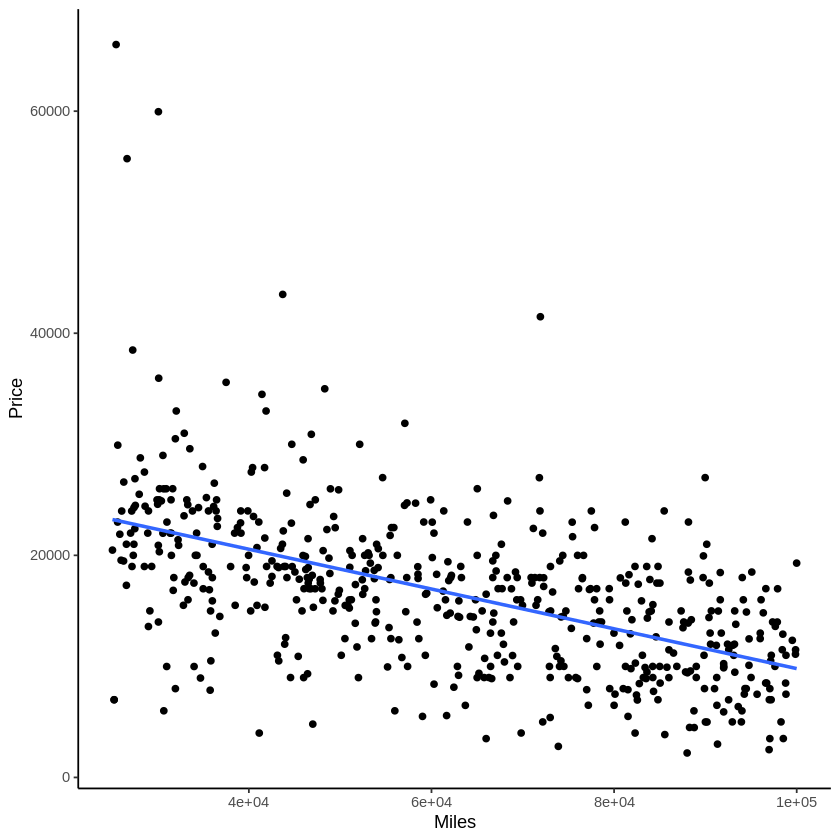

In [7]:
#@title Scatterplot with simple linear regression line
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

## A Visual Inspection Mean/Variance Form

A visual inspection for your assumption regarding the mean and variance functions can be done.


*   If a robust lowess smoother is fairly linear, then the linear mean function is reasonable.
*   If a lowess smoother of the squared residuals is fairly constant, then a constant variance function is reasonable.



Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


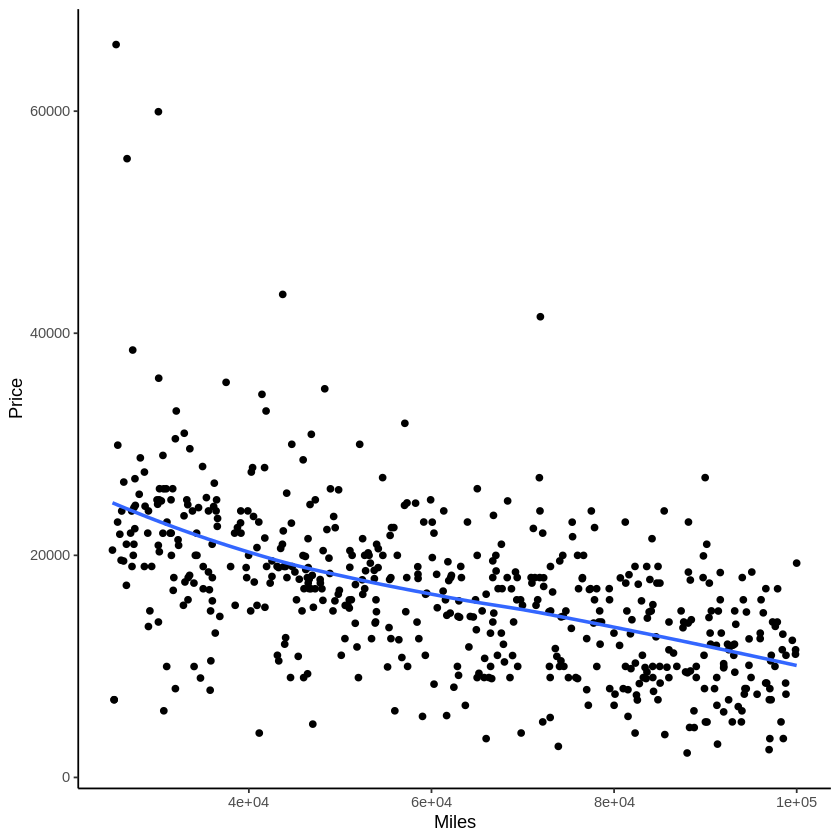

In [8]:
#@title Scatterplot with loess smoother
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  
  theme_classic()

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


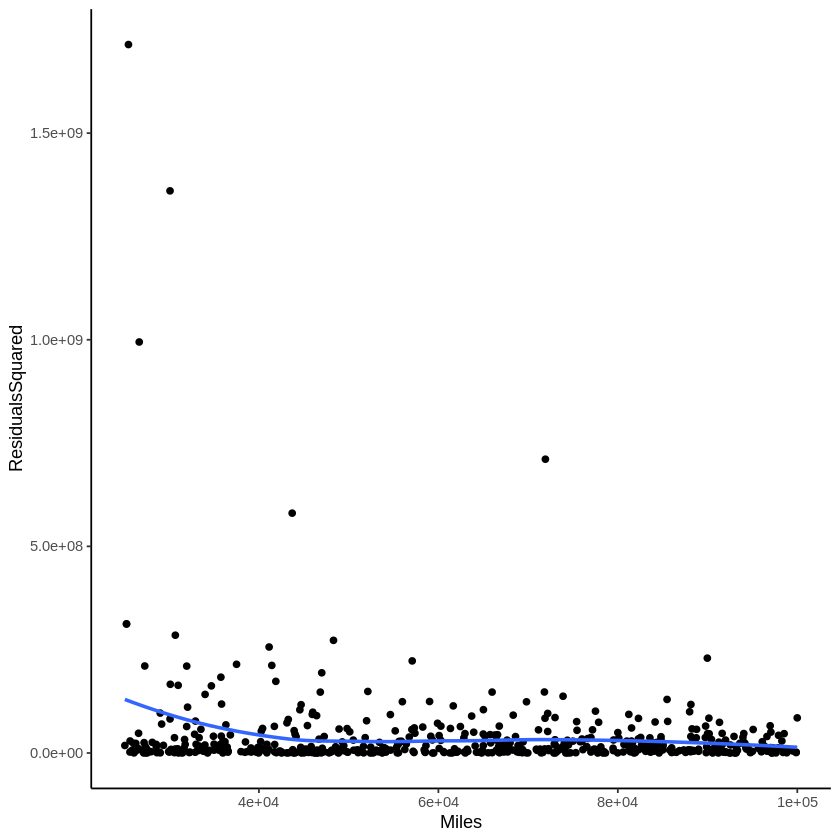

In [9]:
#@title Visual inspection of variance function

#Reduce the data.frame down to the necessary columns
FindCars_CarsOnly_PriceMiles <- ( FindCars_CarsOnly
                                    %>% select(Price, Miles)
                                )
#Obtain a loess fit of Price ~ Miles
LoessFit <- loess(Price ~ Miles, data=FindCars_CarsOnly_PriceMiles)

#Use predict() and mutate to obtain the squared residuals for plotting
FindCars_CarsOnly_PriceMiles <- (FindCars_CarsOnly_PriceMiles
                                   %>% mutate(Price_Predicted = predict(LoessFit, newdata=FindCars_CarsOnly_PriceMiles))
                                   %>% mutate(ResidualsSquared = (Price - Price_Predicted)^2)
                                )

#Scatterplot of Squared Residuals + loess smoother to get constant variance condition
ggplot(data=FindCars_CarsOnly_PriceMiles, aes(x=Miles,y=ResidualsSquared)) + 
  geom_point() +    
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  
  theme_classic()

#Lastly, remove the FindCars_CarsOnly_PriceMiles data.frame
rm(FindCars_CarsOnly_PriceMiles) 

## Fitting the Model

In [10]:
#@title Fitting the simple linear regression model
Car_Model <- lm(Price ~ Miles, data=FindCars_CarsOnly)

In [11]:
#@title Getting a summary of the model
summary(Car_Model)


Call:
lm(formula = Price ~ Miles, data = FindCars_CarsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-16348  -3592   -235   2950  42847 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.771e+04  7.996e+02   34.66   <2e-16 ***
Miles       -1.791e-01  1.216e-02  -14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6247 on 540 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2853 
F-statistic:   217 on 1 and 540 DF,  p-value: < 2.2e-16


Getting the 95% Confidence Interval for parameters in the model, i.e. $\beta_{0}$ and $\beta_{1}$ 

In [12]:
#@title CI for Model Parameters
confint(Car_Model)

,2.5 %,97.5 %
(Intercept),26140.8748739,29282.2651657
Miles,-0.2030094,-0.1552352


## Making a prediction

The first step to making a prediction is to create a new data.frame that contains the values used for making the prediction.

In [13]:
MyCar <- data.frame(Miles = c(60000))

<u>Comment</u>:  The name used for the predictor when creating the MyCar data.frame must match the predictor name from the model fit.

Next, the predict() function can be used to make the prediction.  The predict() function here takes two arguments:


1.   The model object that will be used for the prediction
2.   A data.frame that contians values for which predictions will be made.



In [14]:
predict(Car_Model, newdata=MyCar)

1 
16964.23

## Getting the 95% Confidence Interval and 95% Prediction Interval for a Prediction

The following specification of the predict() function will compute a 95% Confidence Interval for an *average* prediction.

In [15]:
predict(Car_Model, newdata=MyCar, interval = "confid", se=TRUE)

,fit,lwr,upr
1,16964.23,16435.07,17493.39


The following specification of the predict() function will compute a 95% Prediction Interval for an *individual* prediction.

In [16]:
predict(Car_Model, newdata=MyCar, interval = "predict")

,fit,lwr,upr
1,16964.23,4680.882,29247.58


## Getting the 95% Confidence Interval via geom_smooth()

The geom_smooth() function with specification of se=TRUE will create the 95% confidence interval band.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


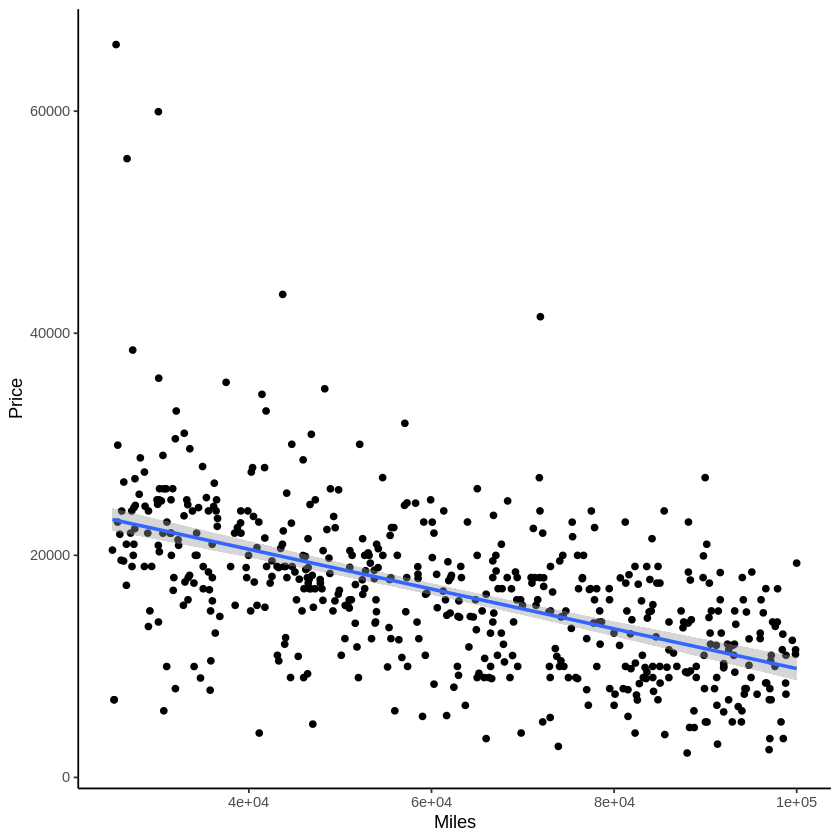

In [17]:
#@title Scatterplot with specification of se=TRUE
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    
  geom_smooth(method='lm', formula = y ~ x, se=TRUE) +  
  theme_classic()

## Getting the 95% Confidence Interval and 95% Prediction Interval Bands

Warning message:
“Removed 26 rows containing missing values (geom_point).”


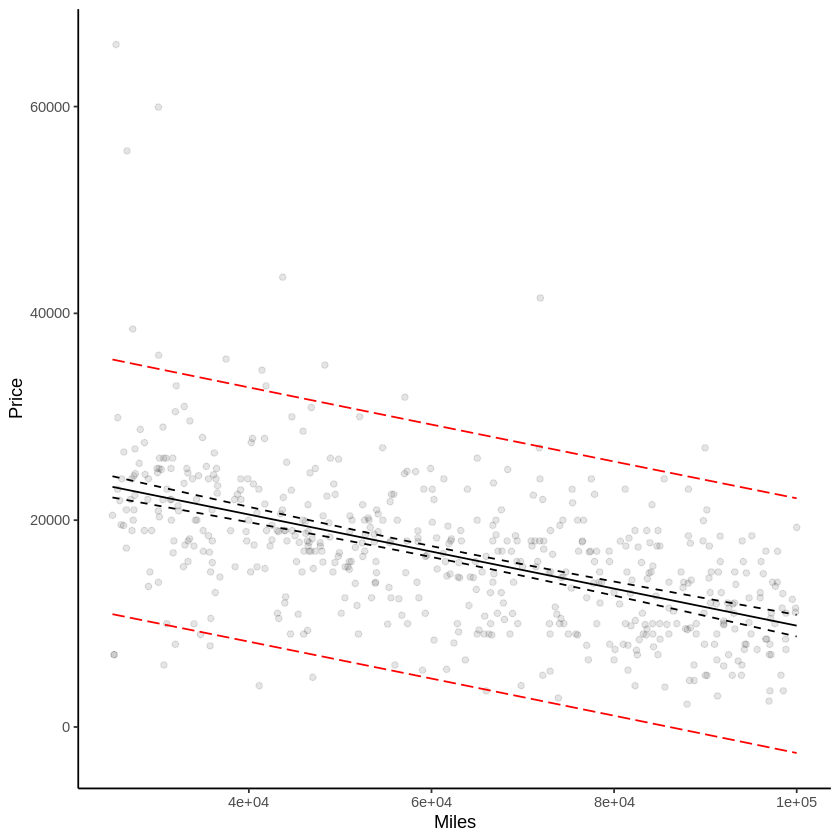

In [18]:
#@title Getting the 95% Confidence Interval and Prediction Interval Bands

#Use predict() and mutate to obtain the 95% CIs and 95% PIs
FindCars_CarsOnly_withPredictions <- (FindCars_CarsOnly
                                   %>% mutate(Price_CI = predict(Car_Model, newdata=FindCars_CarsOnly, interval="confid"))
                                   %>% mutate(Price_PI = predict(Car_Model, newdata=FindCars_CarsOnly, interval="predict"))
                                  )
#Next, pull apart the columns that include the CIs and PIs
FindCars_CarsOnly_withPredictions <- (FindCars_CarsOnly_withPredictions
                                             %>% rowwise()
                                             %>% mutate(
                                                         Price_Predicted = Price_CI[1],
                                                         Price_LowerCI= Price_CI[2],
                                                         Price_UpperCI= Price_CI[3],
                                                         Price_LowerPI= Price_PI[2],
                                                         Price_UpperPI= Price_PI[3],
                                                        )
                                     )

#Scatterplot with 95% Confidence Interval and 95% Prediction Interval bands
ggplot(data=FindCars_CarsOnly_withPredictions, aes(x=Miles,y=Price)) + 
  geom_point(alpha = 0.1) +    
  geom_line(aes(x=Miles,y=Price_Predicted), col="black") +
  geom_line(aes(x=Miles,y=Price_LowerCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_UpperCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_LowerPI), linetype = "longdash", col="red") +
  geom_line(aes(x=Miles,y=Price_UpperPI), linetype = "longdash", col="red") +
  theme_classic()


## Outlier Detection

In [19]:
#@title Get the vehicles that are outliers

#Identify the outliers on the low/high side for price
Outliers <- (FindCars_CarsOnly_withPredictions
                %>% mutate(Outlier = case_when(
                                                Price < Price_LowerPI ~ "Yes, much lower than expected",
                                                Price > Price_UpperPI ~ "Yes, much higher than expected",
                                                TRUE ~ "No"
                                              )
                          )
                %>% select(Description, Year, Price, Miles, Price_Predicted, Dealer, Location, Outlier)
                %>% filter(str_detect(Outlier, "Yes"))  # str_detect looks for keyword in a string
                %>% arrange(Outlier)  # used to sort a data.frame by a particular column
            )
#Print out the outliers
Outliers


Description,Year,Price,Miles,Price_Predicted,Dealer,Location,Outlier
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2019 Acura TLX SH-AWD,2019,35579,37506,20993.41,Tom Kadlec Honda,"Rochester, MN","Yes, much higher than expected"
2017 Audi A4 Premium Plus quattro,2017,26998,89973,11595.40,Park Place Motor Cars,"Rochester, MN","Yes, much higher than expected"
2019 Audi A5 Premium Sportback qu,2019,32998,41884,20209.21,Park Place Motor Cars,"Rochester, MN","Yes, much higher than expected"
2018 Audi A5 Premium Plus S-Line,2018,34498,41434,20289.82,Park Place Motor Cars,"Rochester, MN","Yes, much higher than expected"
2017 Audi S7 Premum Plus quattro,2017,55722,26660,22936.17,Subaru of Rochester,"Rochester, MN","Yes, much higher than expected"
2016 BMW 7 Series 750i xDrive,2016,43498,43707,19882.67,Park Place Motor Cars,"Rochester, MN","Yes, much higher than expected"
2018 BMW M3 Base,2018,65998,25459,23151.30,Park Place Motor Cars,"Rochester, MN","Yes, much higher than expected"
2017 Cadillac CT6 3.6L Luxury,2017,35952,30125,22315.51,Red Wing Chevrolet,"Red Wing, MN","Yes, much higher than expected"
2018 Dodge Charger R/T,2018,31890,57083,17486.73,Chrysler Winona,"Winona, MN","Yes, much higher than expected"


End of Document